In [ ]:
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import shutil

In [ ]:
import os
import random
import shutil

file_paths = [
    "/content/drive/MyDrive/DiseaseDataset/BlueTongue",
    "/content/drive/MyDrive/DiseaseDataset/Papillomatosis",
    "/content/drive/MyDrive/DiseaseDataset/PhotoSensation",
    "/content/drive/MyDrive/DiseaseDataset/Ringworm",
    "/content/drive/MyDrive/DiseaseDataset/ocular",
]

train_folder = "/content/drive/MyDrive/DiseaseData/train"
test_folder = "/content/drive/MyDrive/DiseaseData/test"

train_ratio = 0.7
test_ratio = 0.3

for folder in [train_folder, test_folder]:
    if not os.path.exists(folder):
        os.makedirs(folder)

combined_files = []
for path in file_paths:
    if os.path.isdir(path):
        combined_files.extend([os.path.join(path, file) for file in os.listdir(path)])

random.shuffle(combined_files)

num_files = len(combined_files)
num_train = int(num_files * train_ratio)
num_test = num_files - num_train

for i, file_path in enumerate(combined_files):
    file_name = os.path.basename(file_path)

    if i < num_train:
        target_folder = train_folder
    else:
        target_folder = test_folder

    class_name = os.path.basename(os.path.dirname(file_path))
    class_folder = os.path.join(target_folder, class_name)
    if not os.path.exists(class_folder):
        os.makedirs(class_folder)

    target_path = os.path.join(class_folder, file_name)
    shutil.copy(file_path, target_path)

In [ ]:
print("Files combined and divided into train and test sets.")
print("Train set: ", num_train, " files")
print("Test set: ", num_test, " files")

Files combined and divided into train and test sets.
Train set:  1263  files
Test set:  542  files


## CNN MODEL

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
train_folder = "/content/drive/MyDrive/DiseaseData/train"
test_folder = "/content/drive/MyDrive/DiseaseData/test"

In [ ]:
img_width, img_height = 150, 150
batch_size = 32
num_classes = 5

In [ ]:
# Create ImageDataGenerators for data preprocessing and augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1263 images belonging to 5 classes.
Found 542 images belonging to 5 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 10
model.fit(train_generator, epochs=epochs, validation_data=test_generator)

Epoch 1/10
40/40 [==============================] - 549s 14s/step - loss: 1.3209 - accuracy: 0.4608 - val_loss: 0.8784 - val_accuracy: 0.6882
Epoch 2/10
40/40 [==============================] - 77s 2s/step - loss: 0.7607 - accuracy: 0.7546 - val_loss: 0.7399 - val_accuracy: 0.7878
Epoch 3/10
40/40 [==============================] - 76s 2s/step - loss: 0.3851 - accuracy: 0.8765 - val_loss: 0.5290 - val_accuracy: 0.8450
Epoch 4/10
40/40 [==============================] - 76s 2s/step - loss: 0.2039 - accuracy: 0.9390 - val_loss: 0.3683 - val_accuracy: 0.8838
Epoch 5/10
40/40 [==============================] - 86s 2s/step - loss: 0.1082 - accuracy: 0.9652 - val_loss: 0.3454 - val_accuracy: 0.9317
Epoch 6/10
40/40 [==============================] - 76s 2s/step - loss: 0.0703 - accuracy: 0.9786 - val_loss: 0.3533 - val_accuracy: 0.9207
Epoch 7/10
40/40 [==============================] - 78s 2s/step - loss: 0.1115 - accuracy: 0.9723 - val_loss: 0.4270 - val_accuracy: 0.9280
Epoch 8/10
40/40 [

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

17/17 [==============================] - 9s 502ms/step - loss: 0.3512 - accuracy: 0.9373
Test Accuracy: 93.73%


In [ ]:
model.save('trained_model.keras')

1/1 [==============================] - 0s 114ms/step


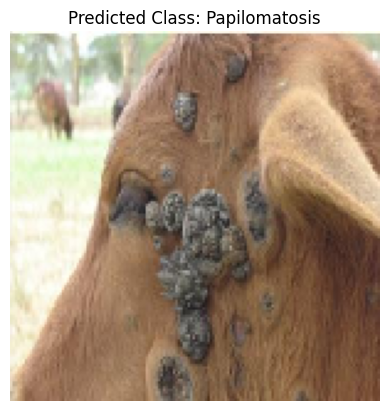

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_class(model_path, img_array, class_labels):
    loaded_model = load_model(model_path)

    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = loaded_model.predict(img_array)
    predicted_class_idx = np.argmax(predictions[0])
    predicted_class_name = class_labels[predicted_class_idx]
    return predicted_class_name

model_path = '/content/trained_model.keras'
class_labels = ['BlueTongue', 'Papilomatosis', 'PhotoSensation', 'Ringworm', 'Ocular']

img_path = '/content/img1.jpeg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)

predicted_class = predict_class(model_path, img_array, class_labels)

plt.imshow(img)
plt.title('Predicted Class: ' + predicted_class)
plt.axis('off')
plt.show()


In [ ]:
!pip install google-generativeai

In [ ]:
import google.generativeai as palm
import os

In [ ]:
palm.configure(api_key='')

In [ ]:
models = [m for m in palm.list_models() if 'generateText' in m.supported_generation_methods]
model = models[0].name
print(model)

models/text-bison-001


In [ ]:
from IPython.display import Markdown
prompt = "what is mean by chatbot"

completion = palm.generate_text(
    model=model,
    prompt=prompt,
    temperature=0,
    max_output_tokens=600,
)

display(Markdown(completion.result))

<IPython.core.display.Markdown object>

In [ ]:
from IPython.display import Markdown
prompt = f"Display details, prevention, treatment, medinice for this {predicted_class} cattle disease. Also recommend any one doctor or hospital in erode and coimbatore, Tamilnadu , India."

completion = palm.generate_text(
    model=model,
    prompt=prompt,
    temperature=0,
    max_output_tokens=600,
)

display(Markdown(completion.result))

**Papillomatosis** is a viral disease of cattle that is caused by the bovine papillomavirus (BPV). The disease is characterized by the development of wart-like lesions on the skin and mucous membranes of affected animals.

**Signs and symptoms**

The most common sign of papillomatosis is the development of wart-like lesions on the skin and mucous membranes of affected animals. These lesions can range in size from a few millimeters to several centimeters and can be single or multiple. They can occur anywhere on the body, but are most commonly found on the head, neck, and teats. In some cases, the lesions can become ulcerated and infected, which can lead to pain and discomfort for the animal.

**Transmission**

BPV is transmitted through direct contact between infected and uninfected animals. The virus can also be transmitted through fomites, such as contaminated needles or surgical instruments.

**Prevention**

There is no vaccine available for papillomatosis. The best way to prevent the disease is to avoid contact between infected and uninfected animals.

**Treatment**

There is no cure for papillomatosis. Treatment is aimed at alleviating the symptoms and preventing the spread of the disease. Treatment options include:

* Surgical removal of lesions
* Cryotherapy (freezing) of lesions
* Topical application of medications, such as salicylic acid or imiquimod
* Systemic administration of medications, such as interferon or cidofovir

**Recommendations**

* **Dr. S. Sivakumar**
* **Apollo Veterinary Hospital**
* **No. 10, 1st Main Road, Ganapathy**
* **Coimbatore, Tamil Nadu 641006**
* **Phone:** +91 422 264 0000
* **Email:** info@apollovethospital.com

* **Dr. K. Sivakumar**
* **Erode Veterinary Hospital**
* **No. 12, West Veli Street, Erode**
* **Erode, Tamil Nadu 638001**
* **Phone:** +91 424 222 0000
* **Email:** info@erodevethospital.com